Сравнение результатов всех моделей и бейзлайна

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor
from sklearn import linear_model
lm = linear_model
import sys
sys.path.append('../data proccessing/')
from api_util import get_near_metro
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [2]:
SIZE_CUT_VALUE = 700
PRICE_CUT_VALUE = 4500

df_train = pd.read_csv('../datasets/data_with_classes_and_metros.csv')
df_train = df_train[(df_train.price < PRICE_CUT_VALUE) &
                    (df_train['size'] < SIZE_CUT_VALUE)]

df_train['log_size'] = pd.Series(df_train['size'].apply(np.log), index=df_train.index)

df_test = pd.read_csv('../datasets/test_data_with_metro_classes.csv')
df_test = df_test[(df_test.price < PRICE_CUT_VALUE) &
                    (df_test['size'] < SIZE_CUT_VALUE)]

df_test['log_size'] = pd.Series(df_test['size'].apply(np.log), index=df_test.index)

df_train.drop(['Unnamed: 0'], inplace=True, axis=1)
print(df_train.head(5))

    size class  price  pledge  near_metro  parking  internet  meal  security  \
0   28.8     b   1354   39000       700.0        0         0     0         0   
1  588.2     b    850  500000       700.0        1         0     0         0   
2   45.0     b   1111   50000       200.0        1         0     0         1   
3  100.0     b   1700  170000       700.0        1         0     0         1   
4  190.0     c    789  150000      1200.0        0         1     0         0   

   comfort        lat        lon  distance  log_size  
0        1  55.745093  37.664815   0.09581  3.360375  
1        1  55.745093  37.664815   0.09581  6.377067  
2        0  55.759659  37.752850   0.27184  3.806662  
3        0  55.569026  37.588647   0.19060  4.605170  
4        0  55.757496  37.802086   0.37023  5.247024  


In [3]:
df_test.drop(['Unnamed: 0'], inplace=True, axis=1)
# df_test.drop(['Unnamed: 0', 'address', 'descr', 'url', 'metros'], inplace=True, axis=1)
print(df_test.head(5))

   size class  price  pledge  near_metro  parking  internet  meal  security  \
0   8.0     a   1250   10000       300.0        0         1     0         0   
1  20.0     b   1450   29000       600.0        0         1     0         0   
2  34.5     b   1043   36000       600.0        1         0     1         1   
3  15.0     b   2667   40000       300.0        0         1     1         1   
4  39.7     b   1700   67490       200.0        0         1     1         1   

   comfort        lat        lon  distance  log_size  
0        4  55.747115  37.539078   0.15589  2.079442  
1        3  55.740466  37.521471   0.19135  2.995732  
2        0  55.830695  37.431010   0.38042  3.540959  
3        5  55.758174  37.634290   0.03532  2.708050  
4        4  55.743320  37.650523   0.06748  3.681351  


# Nan-ы в ближайшем метро

In [4]:
# # df_test.dropna(subset=['class', 'near_metro'], inplace=True)
# null_metro = df_test[df_test['near_metro'].isnull()]

In [5]:
# df_test.shape

In [6]:
# with open('../apies/yandex_organization_search_api.txt') as f:
#     apikey = f.readline()

In [7]:
# for index, row in null_metro.iterrows():
#     null_metro.at[index, 'near_metro'] = get_near_metro(row['lon'], row['lat'], apikey)

In [8]:
# df_test[df_test['near_metro'].isnull()] = null_metro

# Nan-ы в классах

In [9]:
# def fill_class_Nans(df):
#     null_classes = df[df['class'].isnull()].drop(['price'], axis=1)
#     not_null_classes = df[~df['class'].isnull()].drop(['price'], axis=1)
#     ohe_features = ['parking', 'internet', 'meal', 'security']
#     X_data = not_null_classes.drop(['class'], axis=1)
#     X_data.drop(ohe_features, axis=1, inplace=True)
#     y_data = not_null_classes['class'].copy()
#     scaler = StandardScaler()
#     X_data = scaler.fit_transform(X_data)
#     for feature in ohe_features:
#         X_data = np.append(X_data, np.array([not_null_classes[feature]]).T, axis=1)
#     clf = KNeighborsClassifier()
#     scores = cross_val_score(clf, X_data, y_data, cv=5)
#     print(scores)
#     print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
#     clf.fit(X_data, y_data)
#     Target_data = null_classes.drop(['class'], axis=1)
#     Target_data.drop(ohe_features, axis=1, inplace=True)
#     Target_data = pd.DataFrame(scaler.transform(Target_data))
#     for feature in ohe_features:
#         Target_data = np.append(Target_data, np.array([null_classes[feature]]).T, axis=1)
#     classes = clf.predict(Target_data)
#     df.loc[df['class'].isnull(), 'class'] = classes

In [10]:
# fill_class_Nans(df_test)

In [11]:
# df_test.to_csv('test_data_with_metro_classes.csv')

In [12]:
# df_test = pd.read_csv('test_data_with_metro_classes.csv')
# df_test.drop(['Unnamed: 0'], inplace=True, axis=1)
# df_test.head(5)

# Train Test Split

In [13]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df_train['class'] = le.fit_transform(df_train['class'])
df_test['class'] = le.fit_transform(df_test['class'])

In [14]:
X_train = df_train.drop(['price'], axis=1)
y_train = df_train['price'].copy()

In [15]:
X_test = df_test.drop(['price'], axis=1)
y_test = df_test['price'].copy()

## Baseline

In [16]:
def base_line_predict(X_test, X_train, y_train, numeric_class = False):
    """
    Возвращает среднюю классу цену 
    """
    if numeric_class == True:
        a_mean = y_train.loc[X_train[X_train['class'] == 0].index].mean()
        b_mean = y_train.loc[X_train[X_train['class'] == 1].index].mean()
        c_mean = y_train.loc[X_train[X_train['class'] == 2].index].mean()
        d_mean = y_train.loc[X_train[X_train['class'] == 3].index].mean()
    else:
        a_mean = y_train.loc[X_train[X_train['class'] == 'a'].index].mean()
        b_mean = y_train.loc[X_train[X_train['class'] == 'b'].index].mean()
        c_mean = y_train.loc[X_train[X_train['class'] == 'c'].index].mean()
        d_mean = y_train.loc[X_train[X_train['class'] == 'd'].index].mean()
    y_pred = pd.Series(index = X_test.index)
    if numeric_class == True:
        y_pred.loc[X_test[X_test['class'] == 0].index] = a_mean
        y_pred.loc[X_test[X_test['class'] == 1].index] = b_mean
        y_pred.loc[X_test[X_test['class'] == 2].index] = c_mean
        y_pred.loc[X_test[X_test['class'] == 3].index] = d_mean
    else:
        y_pred.loc[X_test[X_test['class'] == 'a'].index] = a_mean
        y_pred.loc[X_test[X_test['class'] == 'b'].index] = b_mean
        y_pred.loc[X_test[X_test['class'] == 'c'].index] = c_mean
        y_pred.loc[X_test[X_test['class'] == 'd'].index] = d_mean
    return y_pred

In [17]:
bs_pred = base_line_predict(X_test=X_test, X_train=X_train,
                                     y_train=y_train, numeric_class=True)

print("baseline is {:5.1f}".format(np.sqrt(mse(y_true=y_test, y_pred=bs_pred))))

baseline is 614.6


## Несколько моделей с деревьями

Лучшее значение равно 523.5 при глубине дерева равной 7.


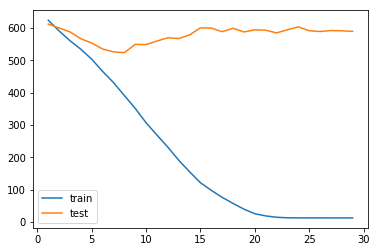

In [18]:
trees = range(1, 30)

train = []
test = []

for tree in trees:
    clf = DecisionTreeRegressor(max_depth=tree, random_state=12345)
    clf.fit(X_train, y_train)
    
    train.append(np.sqrt(mse(y_true=y_train, y_pred=clf.predict(X_train))))
    test.append(np.sqrt(mse(y_true=y_test, y_pred=clf.predict(X_test))))

plt.plot(trees, train, label='train')
plt.plot(trees, test, label='test')
plt.legend()
plt.show

print("Лучшее значение равно {:5.1f} при глубине дерева равной {}.".format(min(test), test.index(min(test))))

# Случайный лес (см. Trees.ipynb)

In [19]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100, random_state=42, 
                            n_jobs=-1, oob_score=True, max_depth=20,
                            min_samples_leaf=1, max_features=11)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features=11, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [20]:
rfr.oob_score_

0.6579270893469547

In [21]:
print("random forest mse:" ,np.sqrt(mse(y_true=y_test, y_pred=rfr.predict(X_test))))

random forest mse: 417.62676857303023


## KNN

In [22]:
ohe_features = ['parking', 'internet', 'meal', 'security']

In [23]:
X_train = df_train.drop(['price'], axis=1)
X_train.drop(ohe_features, axis=1, inplace=True)
y_train = df_train['price'].copy()
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
for feature in ohe_features:
    X_train = np.append(X_train, np.array([df_train[feature]]).T, axis=1)

In [24]:
X_test = df_test.drop(['price'], axis=1)
X_test.drop(ohe_features, axis=1, inplace=True)
y_test = df_test['price'].copy()
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)
for feature in ohe_features:
    X_test = np.append(X_test, np.array([df_test[feature]]).T, axis=1)

In [25]:
n_neighb = range(1, 100, 10)

for n in n_neighb:
    clf = KNN(n_neighbors=n, weights='distance')
    clf.fit(X_train, y_train)
    print("KNN n_neighbors={} {:5.1f}".format(n, np.sqrt(mse(y_true=y_test, y_pred=clf.predict(X_test)))))

KNN n_neighbors=1 680.2
KNN n_neighbors=11 538.9
KNN n_neighbors=21 527.1
KNN n_neighbors=31 530.8
KNN n_neighbors=41 533.0
KNN n_neighbors=51 533.7
KNN n_neighbors=61 535.9
KNN n_neighbors=71 538.1
KNN n_neighbors=81 539.6
KNN n_neighbors=91 541.8


Возле 10 соседей походим поподробнее

In [26]:
n_neighb = range(1, 40)
knn_res = []

for n in n_neighb:
    clf = KNN(n_neighbors=n, weights='distance')
    clf.fit(X_train, y_train)
    knn_res.append(np.sqrt(mse(y_true=y_test, y_pred=clf.predict(X_test))))
    
print("Лучшее значение равно {:5.1f} при числе соседей равном {}.".format(min(knn_res), knn_res.index(min(knn_res))))

Лучшее значение равно 525.9 при числе соседей равном 18.


## Линейная регрессия

In [27]:
clf = lm.LinearRegression()
clf.fit(X_train, y_train)
print("Линейная регрессия {:5.1f}".format(np.sqrt(mse(y_true=y_test, y_pred=clf.predict(X_test)))))

Линейная регрессия 624.9


In [28]:
clf = lm.Ridge(alpha=.5)
clf.fit(X_train, y_train)
print("Ridge {:5.1f}".format(np.sqrt(mse(y_true=y_test, y_pred=clf.predict(X_test)))))

Ridge 624.9


In [29]:
clf = lm.Lasso(alpha=.1)
clf.fit(X_train, y_train)
print("Lasso {:5.1f}".format(np.sqrt(mse(y_true=y_test, y_pred=clf.predict(X_test)))))

Lasso 624.9


## Кластеризации

In [30]:
ohe_features = ['parking', 'internet', 'meal', 'security']

In [31]:
X_train = df_train.copy()
#X_train = df_train.drop(['size'], axis=1)
X_train.drop(ohe_features, axis=1, inplace=True)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
for feature in ohe_features:
    X_train = np.append(X_train, np.array([df_train[feature]]).T, axis=1)

### k-means

In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_clust_max = 5
random_states = [1, 12, 123, 1234, 12345]

for rand in random_states:
    for i in range(2, n_clust_max):
        clf = KMeans(n_clusters=i, init='k-means++', random_state=rand)
        clusters =  clf.fit_predict(X_train)
        score = silhouette_score(X_train, clusters)
        print('n_clusters = {}; score = {}'.format(i, score))
    print()    

n_clusters = 2; score = 0.20801841482599925
n_clusters = 3; score = 0.10988667317796351
n_clusters = 4; score = 0.1283554191912387

n_clusters = 2; score = 0.20801841482599925
n_clusters = 3; score = 0.10978338180810832
n_clusters = 4; score = 0.12836717211831705

n_clusters = 2; score = 0.20801841482599925
n_clusters = 3; score = 0.11009620120544791
n_clusters = 4; score = 0.12814448609281937

n_clusters = 2; score = 0.20801841482599925
n_clusters = 3; score = 0.10978338180810832
n_clusters = 4; score = 0.1283424230388909

n_clusters = 2; score = 0.20801841482599925
n_clusters = 3; score = 0.11009620120544791
n_clusters = 4; score = 0.12706228483228493



### Agglomerative clustering

In [33]:
from sklearn.cluster import AgglomerativeClustering

n_clust_max = 10

for i in range(2, n_clust_max):
    clf = AgglomerativeClustering(n_clusters=i)
    clusters = clf.fit_predict(X_train)
    score = silhouette_score(X_train, clusters)
    print('n_clusters = {}; score = {}'.format(i, score))
print()    

n_clusters = 2; score = 0.2516136508314655
n_clusters = 3; score = 0.09259125616051753
n_clusters = 4; score = 0.0907348512853652
n_clusters = 5; score = 0.09704099312136152
n_clusters = 6; score = 0.1104258635351153
n_clusters = 7; score = 0.11423282977322861
n_clusters = 8; score = 0.12035448387252283
n_clusters = 9; score = 0.11998658723194301



### Gaussian

In [34]:
from sklearn.mixture import GaussianMixture

n_clust_max = 10

for i in range(2, n_clust_max):
    clf = GaussianMixture(n_components=i)
    clf.fit(X_train)
    clusters = clf.predict(X_train)
    score = silhouette_score(X_train, clusters)
    print('n_components = {}; score = {}'.format(i, score))
print() 

n_components = 2; score = 0.13378450095753783
n_components = 3; score = 0.03914420968498157
n_components = 4; score = 0.0650548357282455
n_components = 5; score = 0.05369660747388524
n_components = 6; score = 0.05758608632488651
n_components = 7; score = 0.016722844758329653
n_components = 8; score = 0.008438706537747854
n_components = 9; score = -0.002863515299322441



### DBSCAN

In [35]:
from sklearn.cluster import DBSCAN

n_samp_max = 10

for i in range(2, n_samp_max):
    clf = DBSCAN(eps=0.05, min_samples=i)
    clf.fit(X_train)
    clusters = clf.labels_
    score = silhouette_score(X_train, clusters)
    print('n_samples = {}; score = {}'.format(i, score))
print() 

n_samples = 2; score = -0.4106449934429675
n_samples = 3; score = -0.2637019337065017
n_samples = 4; score = -0.27348590623011254
n_samples = 5; score = -0.17318523810525388
n_samples = 6; score = -0.07886957043957124
n_samples = 7; score = -0.06794894789638396
n_samples = 8; score = -0.06794894789638396
n_samples = 9; score = -0.040732145972830286



In [36]:
n_clust = 2

clf = AgglomerativeClustering(n_clusters=n_clust)
clusters =  clf.fit_predict(X_train)

df_train_tmp = df_train.copy()
df_train_tmp['clusters'] = pd.Series(clusters, index=df_train_tmp.index)
df_train_tmp.head(5)

,size,class,price,pledge,near_metro,parking,internet,meal,security,comfort,lat,lon,distance,log_size,clusters
0,28.8,1,1354,39000,700.0,0,0,0,0,1,55.745093,37.664815,0.09581,3.360375,0
1,588.2,1,850,500000,700.0,1,0,0,0,1,55.745093,37.664815,0.09581,6.377067,1
2,45.0,1,1111,50000,200.0,1,0,0,1,0,55.759659,37.752850,0.27184,3.806662,0
3,100.0,1,1700,170000,700.0,1,0,0,1,0,55.569026,37.588647,0.19060,4.605170,0
4,190.0,2,789,150000,1200.0,0,1,0,0,0,55.757496,37.802086,0.37023,5.247024,0


In [37]:
means = pd.DataFrame(columns=df_train.columns)

for i in range(n_clust):
    ser = pd.Series()
    for feature in df_train_tmp:
        ser[feature] = df_train_tmp[df_train_tmp['clusters'] == i][feature].mean()
    means = means.append(ser, ignore_index=True)
    
means = means.drop(['clusters', 'lat', 'lon'], axis=1)    
    
means     

,size,class,price,pledge,near_metro,parking,internet,meal,security,comfort,distance,log_size
0,69.058422,1.059451,1324.242378,59259.300686,820.146711,0.523247,0.349085,0.314405,0.488948,2.710747,0.171007,3.864934
1,373.079672,0.839344,1438.754098,361596.491803,717.160797,0.606557,0.232787,0.259016,0.488525,2.501639,0.122518,5.842703
